<html>
<font color = green size = 6>
<b>
Churn Prediction
</b>
</font>
</html>

In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row, SparkSession
from pyspark.sql.types import NumericType
from pyspark.sql.functions import *

In [2]:
sc = SparkContext.getOrCreate()
spark = SQLContext(sc)

In [3]:
churndf = spark.read.csv(path = "churndata.csv", header = True,inferSchema = True)

In [4]:
type(churndf)

pyspark.sql.dataframe.DataFrame

In [83]:
churndf.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|85228|
|    0|14181|
+-----+-----+



In [6]:
len(churndf.columns)

22

In [7]:
churndf.printSchema()

root
 |-- AvatarID: integer (nullable = true)
 |-- Class_Warlock: integer (nullable = true)
 |-- Class_Druid: integer (nullable = true)
 |-- Class_Hunter: integer (nullable = true)
 |-- Class_DeathKnight: integer (nullable = true)
 |-- Class_Paladin: integer (nullable = true)
 |-- Class_Rogue: integer (nullable = true)
 |-- Class_Mage: integer (nullable = true)
 |-- Class_Priest: integer (nullable = true)
 |-- Class_Warrior: integer (nullable = true)
 |-- Class_Shaman: integer (nullable = true)
 |-- Race_Orc: integer (nullable = true)
 |-- Race_Tauren: integer (nullable = true)
 |-- Race_Undead: integer (nullable = true)
 |-- Race_BloodElf: integer (nullable = true)
 |-- Race_Troll: integer (nullable = true)
 |-- ZonesPlayed: integer (nullable = true)
 |-- LevelFlag: integer (nullable = true)
 |-- GuildFlag: integer (nullable = true)
 |-- DaysPlayed: integer (nullable = true)
 |-- PlayerTenure: integer (nullable = true)
 |-- Churn: integer (nullable = true)



In [8]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'

In [9]:
pd.DataFrame(churndf.take(5), columns=churndf.columns)

,AvatarID,Class_Warlock,Class_Druid,Class_Hunter,Class_DeathKnight,Class_Paladin,Class_Rogue,Class_Mage,Class_Priest,Class_Warrior,...,Race_Tauren,Race_Undead,Race_BloodElf,Race_Troll,ZonesPlayed,LevelFlag,GuildFlag,DaysPlayed,PlayerTenure,Churn
0,148,0,0,0,0,0,0,0,0,0,...,1,0,0,0,10949,2,1,534,1074,0
1,463,0,0,0,0,0,0,0,1,0,...,0,1,0,0,4740,2,1,263,805,1
2,471,0,0,0,0,0,0,0,0,1,...,0,0,0,0,532,2,1,15,495,1
3,496,0,0,0,0,0,0,0,0,1,...,0,0,0,0,4,1,0,1,0,1
4,833,0,0,0,0,0,0,0,0,1,...,0,0,0,0,2,1,0,1,0,1


In [10]:
churndf_pd = churndf.toPandas()

In [11]:
churndf_pd.describe()

,AvatarID,Class_Warlock,Class_Druid,Class_Hunter,Class_DeathKnight,Class_Paladin,Class_Rogue,Class_Mage,Class_Priest,Class_Warrior,...,Race_Tauren,Race_Undead,Race_BloodElf,Race_Troll,ZonesPlayed,LevelFlag,GuildFlag,DaysPlayed,PlayerTenure,Churn
count,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,...,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000,99409.000000
mean,44664.315092,0.103864,0.045046,0.122846,0.019093,0.087346,0.118541,0.117303,0.071161,0.229144,...,0.157692,0.182388,0.311501,0.157622,470.744309,1.132584,0.241035,22.931143,130.063103,0.857347
std,26348.982958,0.305085,0.207407,0.328262,0.136852,0.282343,0.323249,0.321783,0.257094,0.420284,...,0.364454,0.386166,0.463109,0.364388,2037.218414,0.339126,0.427713,72.165708,245.672152,0.349720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,21545.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,44275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,2.000000,2.000000,1.000000
75%,67415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,69.000000,1.000000,0.000000,9.000000,125.000000,1.000000
max,91064.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,154976.000000,2.000000,1.000000,1082.000000,1105.000000,1.000000


<html>
<font color = Purple size = 4>
<b> Scatterplot</b>
</font>
</html>

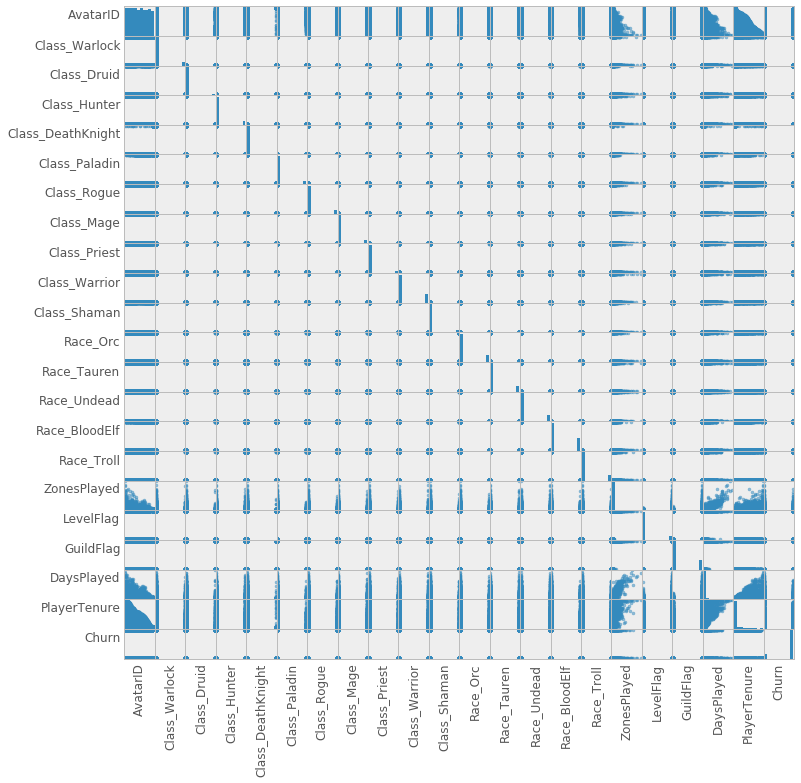

In [12]:
numeric_features = [t[0] for t in churndf.dtypes if t[1] == 'int' or t[1] == 'double']

sampled_data = churndf.select(numeric_features).sample(False, 0.10).toPandas()

axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [14]:
import numpy as np
df = churndf.toPandas().corr()
# Extract values and row, column names
arr = df.values
index_names = df.index
col_names = df.columns

#  Get indices where such threshold is crossed; avoid diagonal elems
R,C = np.where(np.triu(arr,1)>0.8)

# Arrange those in columns and put out as a dataframe
out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
df_out = pd.DataFrame(out_arr,columns=[['row_name','col_name','value']])

df_out

,row_name,col_name,value
0,ZonesPlayed,DaysPlayed,0.876356


<html>
<font color = Purple size = 4>
<b> Correlation between Churn and other variables</b>
</font>
</html>

In [15]:
churndf.toPandas().corr()["Churn"]

AvatarID            -0.250078
Class_Warlock        0.007344
Class_Druid         -0.020969
Class_Hunter        -0.003235
Class_DeathKnight   -0.342026
Class_Paladin       -0.004314
Class_Rogue          0.028567
Class_Mage           0.004691
Class_Priest        -0.008601
Class_Warrior        0.086201
Class_Shaman         0.022992
Race_Orc             0.059347
Race_Tauren         -0.006612
Race_Undead         -0.006298
Race_BloodElf       -0.054013
Race_Troll           0.017937
ZonesPlayed         -0.252384
LevelFlag           -0.436214
GuildFlag           -0.268530
DaysPlayed          -0.361327
PlayerTenure        -0.373687
Churn                1.000000
Name: Churn, dtype: float64

In [91]:
churndf.createOrReplaceTempView("churntable")
churndata = spark.sql("select * from churntable where Churn = 1 limit 14181")
nonchurndata = spark.sql("select * from churntable where Churn = 0 limit 14181")
churndf = churndata.union(nonchurndata)
churndf.groupby('Churn').count().show()

<html>
<font color = Purple size = 4>
<b> Apply Random Forest Classifier from SparkML</b>
</font>
</html>

In [101]:
from pyspark.ml.classification import RandomForestClassifier as RF
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer

from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np
import functools
from pyspark.ml.feature import OneHotEncoder

cols_now = ['Class_Warlock','Class_Druid', 'Class_Hunter',
            'Class_DeathKnight', 'Class_Paladin', 'Class_Rogue',
            'Class_Mage', 'Class_Priest', 'Class_Warrior',
            'Class_Shaman', 'Race_Orc', 'Race_Tauren', 'Race_Undead',
            'Race_BloodElf', 'Race_Troll', 'ZonesPlayed', 'LevelFlag',
            'GuildFlag', 'DaysPlayed', 'PlayerTenure'
]

assembler_features = VectorAssembler(inputCols=cols_now, outputCol='features')

In [102]:
labelIndexer = StringIndexer(inputCol="Churn", outputCol='label').fit(churndf)
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)

In [103]:
allData = pipeline.fit(churndf).transform(churndf)
allData.cache()

trainingData, testData = allData.randomSplit([0.70,0.30], seed=0)

In [104]:
rf = RF(labelCol='label', featuresCol='features',numTrees=150)
fit = rf.fit(trainingData)
transformed = fit.transform(testData)

In [105]:
transformed.select("Churn", "probability", "prediction").show(5)

+-----+--------------------+----------+
|Churn|         probability|prediction|
+-----+--------------------+----------+
|    1|[0.36603045585054...|       1.0|
|    1|[0.73221408595827...|       0.0|
|    1|[0.27061122241881...|       1.0|
|    1|[0.66975419278734...|       0.0|
|    1|[0.65425018364164...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



<html>
<font color = Purple size = 4>
<b> Calculate Model Accuracy</b>
</font>
</html>

In [106]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.8102501007455151)


<html>
<font color = Purple size = 4>
<b> Plot ROC Curve</b>
</font>
</html>

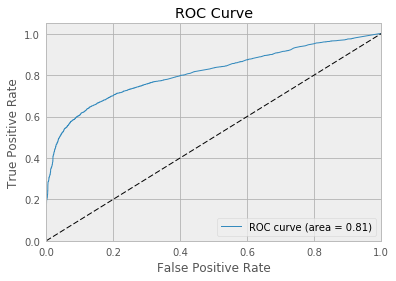

In [107]:
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<html>
<font color = Purple size = 4>
<b> Plot Variable of Importance</b>
</font>
</html>

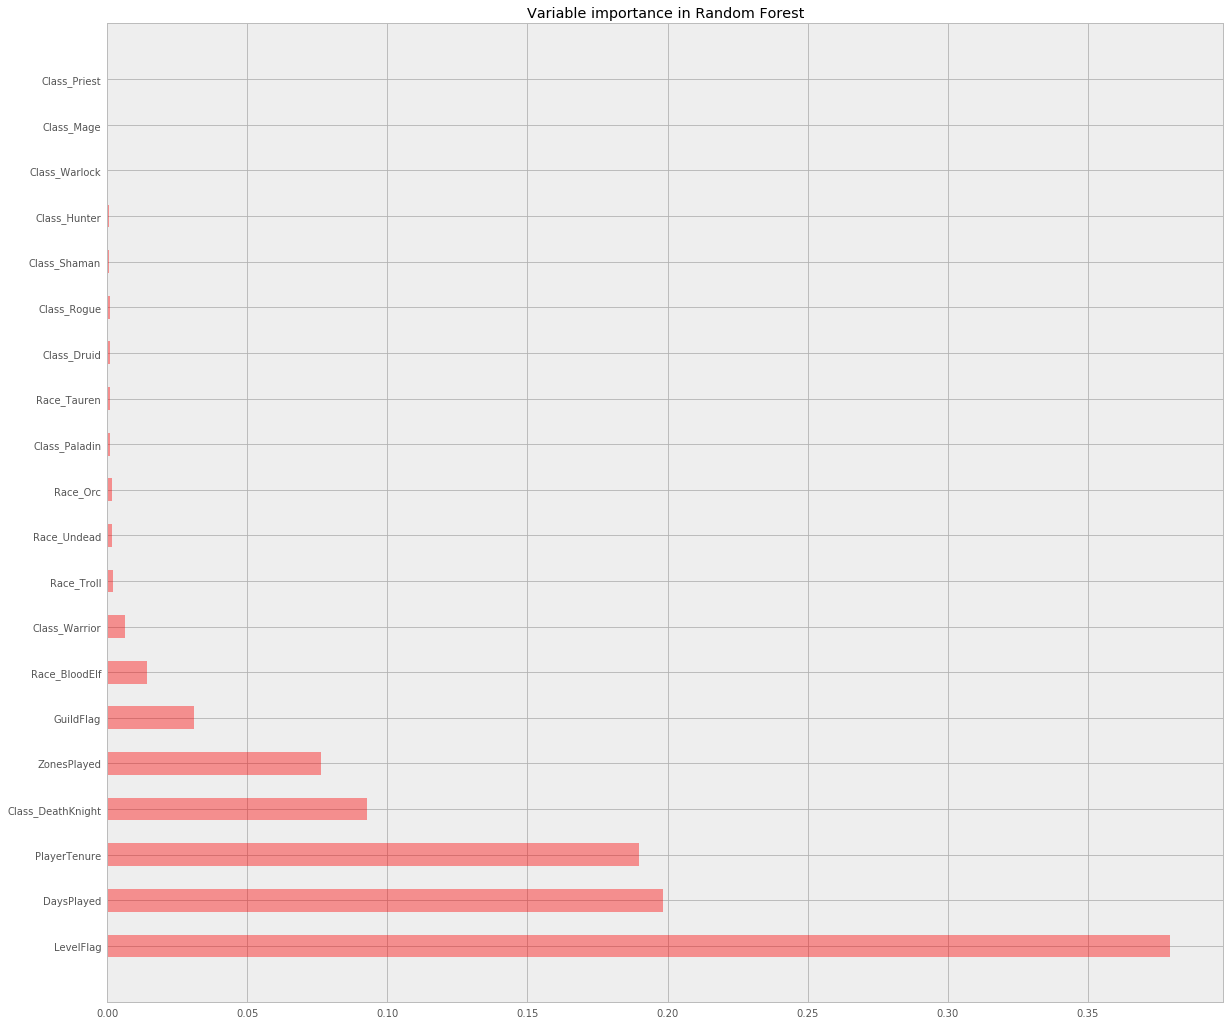

In [108]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(fit.featureImportances.values)
df_f.rename(columns = {0:'importance'}, inplace = True)
df_f["labels"] = cols_now

df_f.sort_values("importance", inplace=True, ascending=False)

index = np.arange(len(df_f['importance']))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='Red', label='Main')
plt.yticks(index, df_f["labels"])
plt.title("Variable importance in Random Forest")
plt.show()

In [109]:
df_f.head(5)

,importance,labels
16,0.379348,LevelFlag
18,0.198343,DaysPlayed
19,0.189718,PlayerTenure
3,0.092719,Class_DeathKnight
15,0.076479,ZonesPlayed


<html>
<font color = Purple size = 4>
<b> Apply DecisionTree Classifier</b>
</font>
</html>

In [110]:
from pyspark.ml.classification import DecisionTreeClassifier as DF

In [111]:
dt = DF(maxDepth=6, labelCol="label")

In [112]:
model = dt.fit(trainingData)

In [113]:
transformed = model.transform(testData)

In [114]:
transformed.select("Churn", "probability", "prediction").show(5)

+-----+--------------------+----------+
|Churn|         probability|prediction|
+-----+--------------------+----------+
|    1|[0.22644497228820...|       1.0|
|    1|[0.69613259668508...|       0.0|
|    1|[0.30381383322559...|       1.0|
|    1|[0.31547619047619...|       1.0|
|    1|[0.59923664122137...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [115]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.8145357030917678)


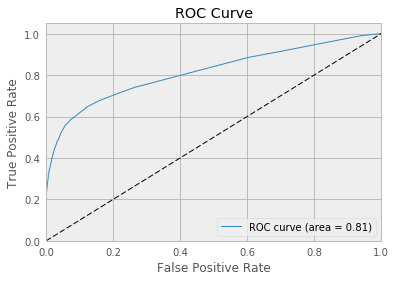

In [116]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<html>
<font color = Purple size = 4>
<b> Optimize model with Variable of Importance</b>
</font>
</html>

<html>
<font color = blue size = 4>
<b> Optimize Random Forest</b>
</font>
</html>

In [117]:
cols_now = ['LevelFlag','Class_DeathKnight','DaysPlayed','PlayerTenure','ZonesPlayed']
assembler_features = VectorAssembler(inputCols=cols_now, outputCol='features')
labelIndexer = StringIndexer(inputCol="Churn", outputCol='label').fit(churndf)
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)

In [118]:
rf = RF(labelCol='label', featuresCol='features',numTrees=30)
fit = rf.fit(trainingData)
transformed = fit.transform(testData)

In [119]:
transformed.select("Churn", "probability", "prediction").show(5)

+-----+--------------------+----------+
|Churn|         probability|prediction|
+-----+--------------------+----------+
|    1|[0.39254122194260...|       1.0|
|    1|[0.71429660591830...|       0.0|
|    1|[0.26160624572436...|       1.0|
|    1|[0.63316103479664...|       0.0|
|    1|[0.60617262348066...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [120]:
results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.8069571775583774)


In [121]:
transformed.crosstab('Churn', 'prediction').show()

+----------------+----+----+
|Churn_prediction| 0.0| 1.0|
+----------------+----+----+
|               1| 559|3641|
|               0|2752|1502|
+----------------+----+----+



<html>
<font color = blue size = 4>
<b> Optimize DecisionTree</b>
</font>
</html>

In [122]:
dt = DF(maxDepth=10, labelCol="label")
model = dt.fit(trainingData)
transformed = model.transform(testData)
transformed.select("Churn", "probability", "prediction").show(5)

+-----+--------------------+----------+
|Churn|         probability|prediction|
+-----+--------------------+----------+
|    1|[0.28158844765342...|       1.0|
|    1|[0.71428571428571...|       0.0|
|    1|[0.18734793187347...|       1.0|
|    1|           [0.0,1.0]|       1.0|
|    1|[0.68604651162790...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [123]:
results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.8152905108917098)


In [124]:
transformed.crosstab('Churn', 'prediction').show()

+----------------+----+----+
|Churn_prediction| 0.0| 1.0|
+----------------+----+----+
|               1| 488|3712|
|               0|2763|1491|
+----------------+----+----+



<html>
<font color = blue size = 4>
<b> Gradient-boosted tree classifier</b>
</font>
</html>

In [125]:
from pyspark.ml.classification import GBTClassifier


# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel").fit(churndf)
# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
cols_now = ['LevelFlag','Class_DeathKnight','DaysPlayed','PlayerTenure']
featureIndexer =   VectorAssembler(inputCols=cols_now, outputCol="indexedFeatures")

In [126]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = churndf.randomSplit([0.7, 0.3])

In [127]:
# Train a GBT model.
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

In [128]:
# Chain indexers and GBT in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

In [129]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [130]:
# Make predictions.
predictions = model.transform(testData)

In [131]:
# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         1.0|
|       0.0|         1.0|
|       0.0|         1.0|
|       0.0|         1.0|
|       0.0|         1.0|
+----------+------------+
only showing top 5 rows



In [132]:
results = predictions.select(['probability', 'indexedLabel','prediction'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.7877093775804722)


In [133]:
 predictions.crosstab('Churn','prediction').show()

+----------------+----+----+
|Churn_prediction| 0.0| 1.0|
+----------------+----+----+
|               1| 606|3703|
|               0|2654|1524|
+----------------+----+----+



In [134]:
gbtModel = model.stages[2]
print(gbtModel)  # summary only

GBTClassificationModel (uid=GBTClassifier_476bbbd40601071488b6) with 10 trees


<html>
<font color = blue size = 4>
<b> DecisionTree with or without regularization gives the better training accuracy of 81% and test accuracy of 70% compared to Random Forest classifier and Gradient-boosted tree classifier. <br />
The values of False Positive and False Negative are also lesser compared to other two models.</b>
</font>
</html>